Random Forest Results
Accuracy: 0.9957

Classification Report:
               precision    recall  f1-score   support

       Apple       1.00      0.99      1.00       311
      Banana       0.99      1.00      0.99       222
      Burger       0.99      0.99      0.99       969
       Donut       1.00      1.00      1.00       929
   Ice Cream       1.00      1.00      1.00       606
       Pasta       1.00      1.00      1.00       825
       Pizza       0.99      0.99      0.99      1153
       Salad       1.00      1.00      1.00       199
       Steak       1.00      1.00      1.00       393
       Sushi       1.00      1.00      1.00       671

    accuracy                           1.00      6278
   macro avg       1.00      1.00      1.00      6278
weighted avg       1.00      1.00      1.00      6278



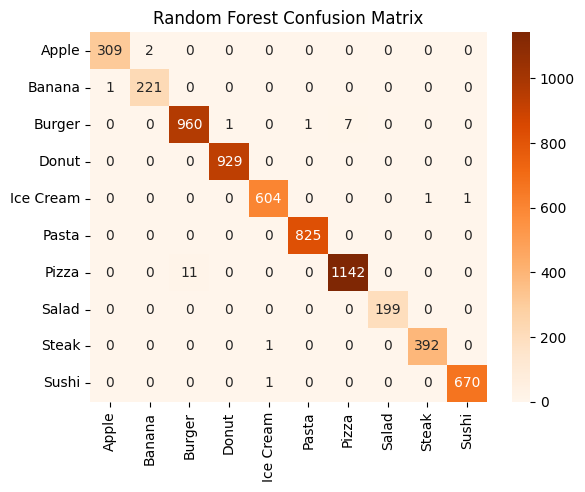

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

feature_data_path=Path("../Data/feature_engineered_data.csv")
df = pd.read_csv(feature_data_path)
X = df.drop(columns=['Food_Name_Encoded'])
y = df['Food_Name_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
target_names = ['Apple', 'Banana', 'Burger', 'Donut', 'Ice Cream', 'Pasta', 'Pizza', 'Salad', 'Steak', 'Sushi']

print("Random Forest Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges', xticklabels=target_names, yticklabels=target_names)
plt.title('Random Forest Confusion Matrix')
plt.show()

In [4]:
d=X_test.iloc[[0]].copy()
print(d)
column_names_list = d.columns.tolist()
print(column_names_list)
feature_means = X_train.mean()
print(feature_means)
d['Calories']=0.000266
d['Protein']=2
d['Fat']=0.001471
d['Carbs']=0.000168
d['Sugar']=-0.003085
d['Fiber']=0.001743
d['Sodium']=0.004885
d['Cholesterol']=0.003911
d['Glycemic_Index']=0.003281
d['Water_Content']=0.002963
d['Serving_Size']=0.005418
d['Prep_baked']=False
d['Prep_fried']=True
d['Prep_grilled']=False
d['Prep_raw']=False
d['Meal_breakfast']=False
d['Meal_dinner']=False
d['Meal_lunch']=True
d['Meal_snack']=False
d['Is_Gluten_Free']=1
d['Is_Vegan']=0

       Calories   Protein       Fat     Carbs     Sugar     Fiber    Sodium  \
27249 -0.731421 -0.622322  0.147443  0.363288  1.607528 -0.377339  0.065373   

       Cholesterol  Glycemic_Index  Water_Content  ...  Is_Vegan  \
27249    -0.242558        0.724944      -1.288546  ...         0   

       Is_Gluten_Free  Meal_breakfast  Meal_dinner  Meal_lunch  Meal_snack  \
27249               0            True        False       False       False   

       Prep_baked  Prep_fried  Prep_grilled  Prep_raw  
27249        True       False         False     False  

[1 rows x 21 columns]
['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size', 'Is_Vegan', 'Is_Gluten_Free', 'Meal_breakfast', 'Meal_dinner', 'Meal_lunch', 'Meal_snack', 'Prep_baked', 'Prep_fried', 'Prep_grilled', 'Prep_raw']
Calories          0.000266
Protein           0.006387
Fat               0.001471
Carbs             0.000168
Sugar            -0.003

In [5]:
prediction=model.predict(d)
print("prediction result:",prediction[0])
# 1. Get the probabilities
probs = model.predict_proba(d)[0]
food_names = ["Apple", "Banana", "Burger", "Donut", "Ice Cream", "Pasta", "Pizza", "Salad", "Steak", "Sushi"]

result_list = [
    {"label": food_names[i], "probability": round(float(probs[i]), 4)} 
    for i in range(len(probs))
]

test = [
    {"label": label, "probability": round(float(prob), 4)} 
    for label, prob in zip(model.classes_, probs)
]

# 3. Sort by probability
result_list = sorted(result_list, key=lambda x: x['probability'], reverse=True)

print(result_list)
print(test)

prediction result: 9
[{'label': 'Sushi', 'probability': 0.68}, {'label': 'Donut', 'probability': 0.1}, {'label': 'Ice Cream', 'probability': 0.09}, {'label': 'Burger', 'probability': 0.06}, {'label': 'Steak', 'probability': 0.04}, {'label': 'Banana', 'probability': 0.02}, {'label': 'Pasta', 'probability': 0.01}, {'label': 'Apple', 'probability': 0.0}, {'label': 'Pizza', 'probability': 0.0}, {'label': 'Salad', 'probability': 0.0}]
[{'label': np.int64(0), 'probability': 0.0}, {'label': np.int64(1), 'probability': 0.02}, {'label': np.int64(2), 'probability': 0.06}, {'label': np.int64(3), 'probability': 0.1}, {'label': np.int64(4), 'probability': 0.09}, {'label': np.int64(5), 'probability': 0.01}, {'label': np.int64(6), 'probability': 0.0}, {'label': np.int64(7), 'probability': 0.0}, {'label': np.int64(8), 'probability': 0.04}, {'label': np.int64(9), 'probability': 0.68}]
